In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE 

import xgboost as xgb

In [3]:
batting = pd.read_csv('data/baseballdatabank-master/core/batting.csv')

In [4]:
batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/(batting['AB'] + batting['BB'] + batting['HBP'] + batting['SF'])

In [5]:
batting = batting[batting['yearID'] >= 2010]

In [6]:
batting = batting.dropna()

In [7]:
target_data = batting[batting['yearID'] == 2020]

In [8]:
training_data = batting[batting['yearID'] != 2020]

In [9]:
training_data = training_data.drop(columns=['playerID','stint','teamID','lgID','CS','G'])

In [11]:
training_data.shape

(10246, 17)

In [12]:
X = training_data.drop(columns='OBP')
y = training_data['OBP']

In [13]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8)

In [15]:
linreg = LinearRegression()

In [16]:
linreg.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = linreg.predict(X_test)

In [18]:
metrics.r2_score(y_test, y_pred)

0.2027914695462495

In [19]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [20]:
params = {
    # Parameters that we are going to tune.
    'max_depth':4,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 0.5,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric':'mae',
    'booster':'gbtree',
    'random_state':17,
    'verbosity':1,
    'n_jobs':5
}

In [21]:
num_boost_round=15

In [22]:
xgb_r = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=30
)

[0]	Test-mae:0.19476
[1]	Test-mae:0.13970
[2]	Test-mae:0.10511
[3]	Test-mae:0.08109
[4]	Test-mae:0.06613
[5]	Test-mae:0.05363
[6]	Test-mae:0.04565
[7]	Test-mae:0.04146
[8]	Test-mae:0.03777
[9]	Test-mae:0.03579
[10]	Test-mae:0.03368
[11]	Test-mae:0.03265
[12]	Test-mae:0.03142
[13]	Test-mae:0.03089
[14]	Test-mae:0.02970


In [23]:
y_predxg = xgb_r.predict(dtest)

In [24]:
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.137268


In [25]:
r2_score(y_test, y_predxg)

0.9154735052954601

<AxesSubplot:>

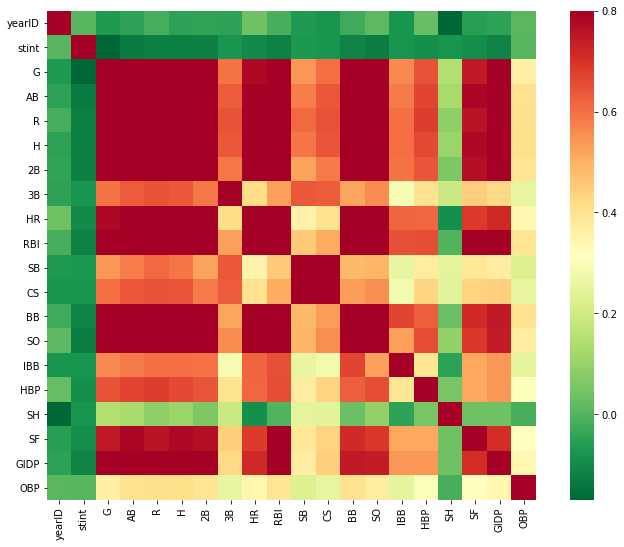

In [26]:
corrmat = batting.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

In [27]:
target_data = target_data.drop(columns=['playerID','stint','teamID','lgID','CS','G'])

In [28]:
X = target_data.drop(columns='OBP')
y = target_data['OBP']

In [29]:
X = scale.transform(X)

In [30]:
dfinal = xgb.DMatrix(X, label=y)

In [31]:
y_2020_pred = xgb_r.predict(dfinal)

In [32]:
metrics.r2_score(y, y_2020_pred)

0.667390590336138